In [1]:
import numpy as np
from HaiMeiKang.config import *
import pandas
import mne
import matplotlib

2024-07-29 11:20:57 - Start Program

pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [9]:
folder=data_dir+'EEG_with_stimulation/raw/'
filename1=folder+'R2_p.dat' # index finger, 
raws=mne.io.read_raw_curry(filename1,preload=True)
filename2=folder+'resting.dat' # index finger, 
rawr=mne.io.read_raw_curry(filename2,preload=True)

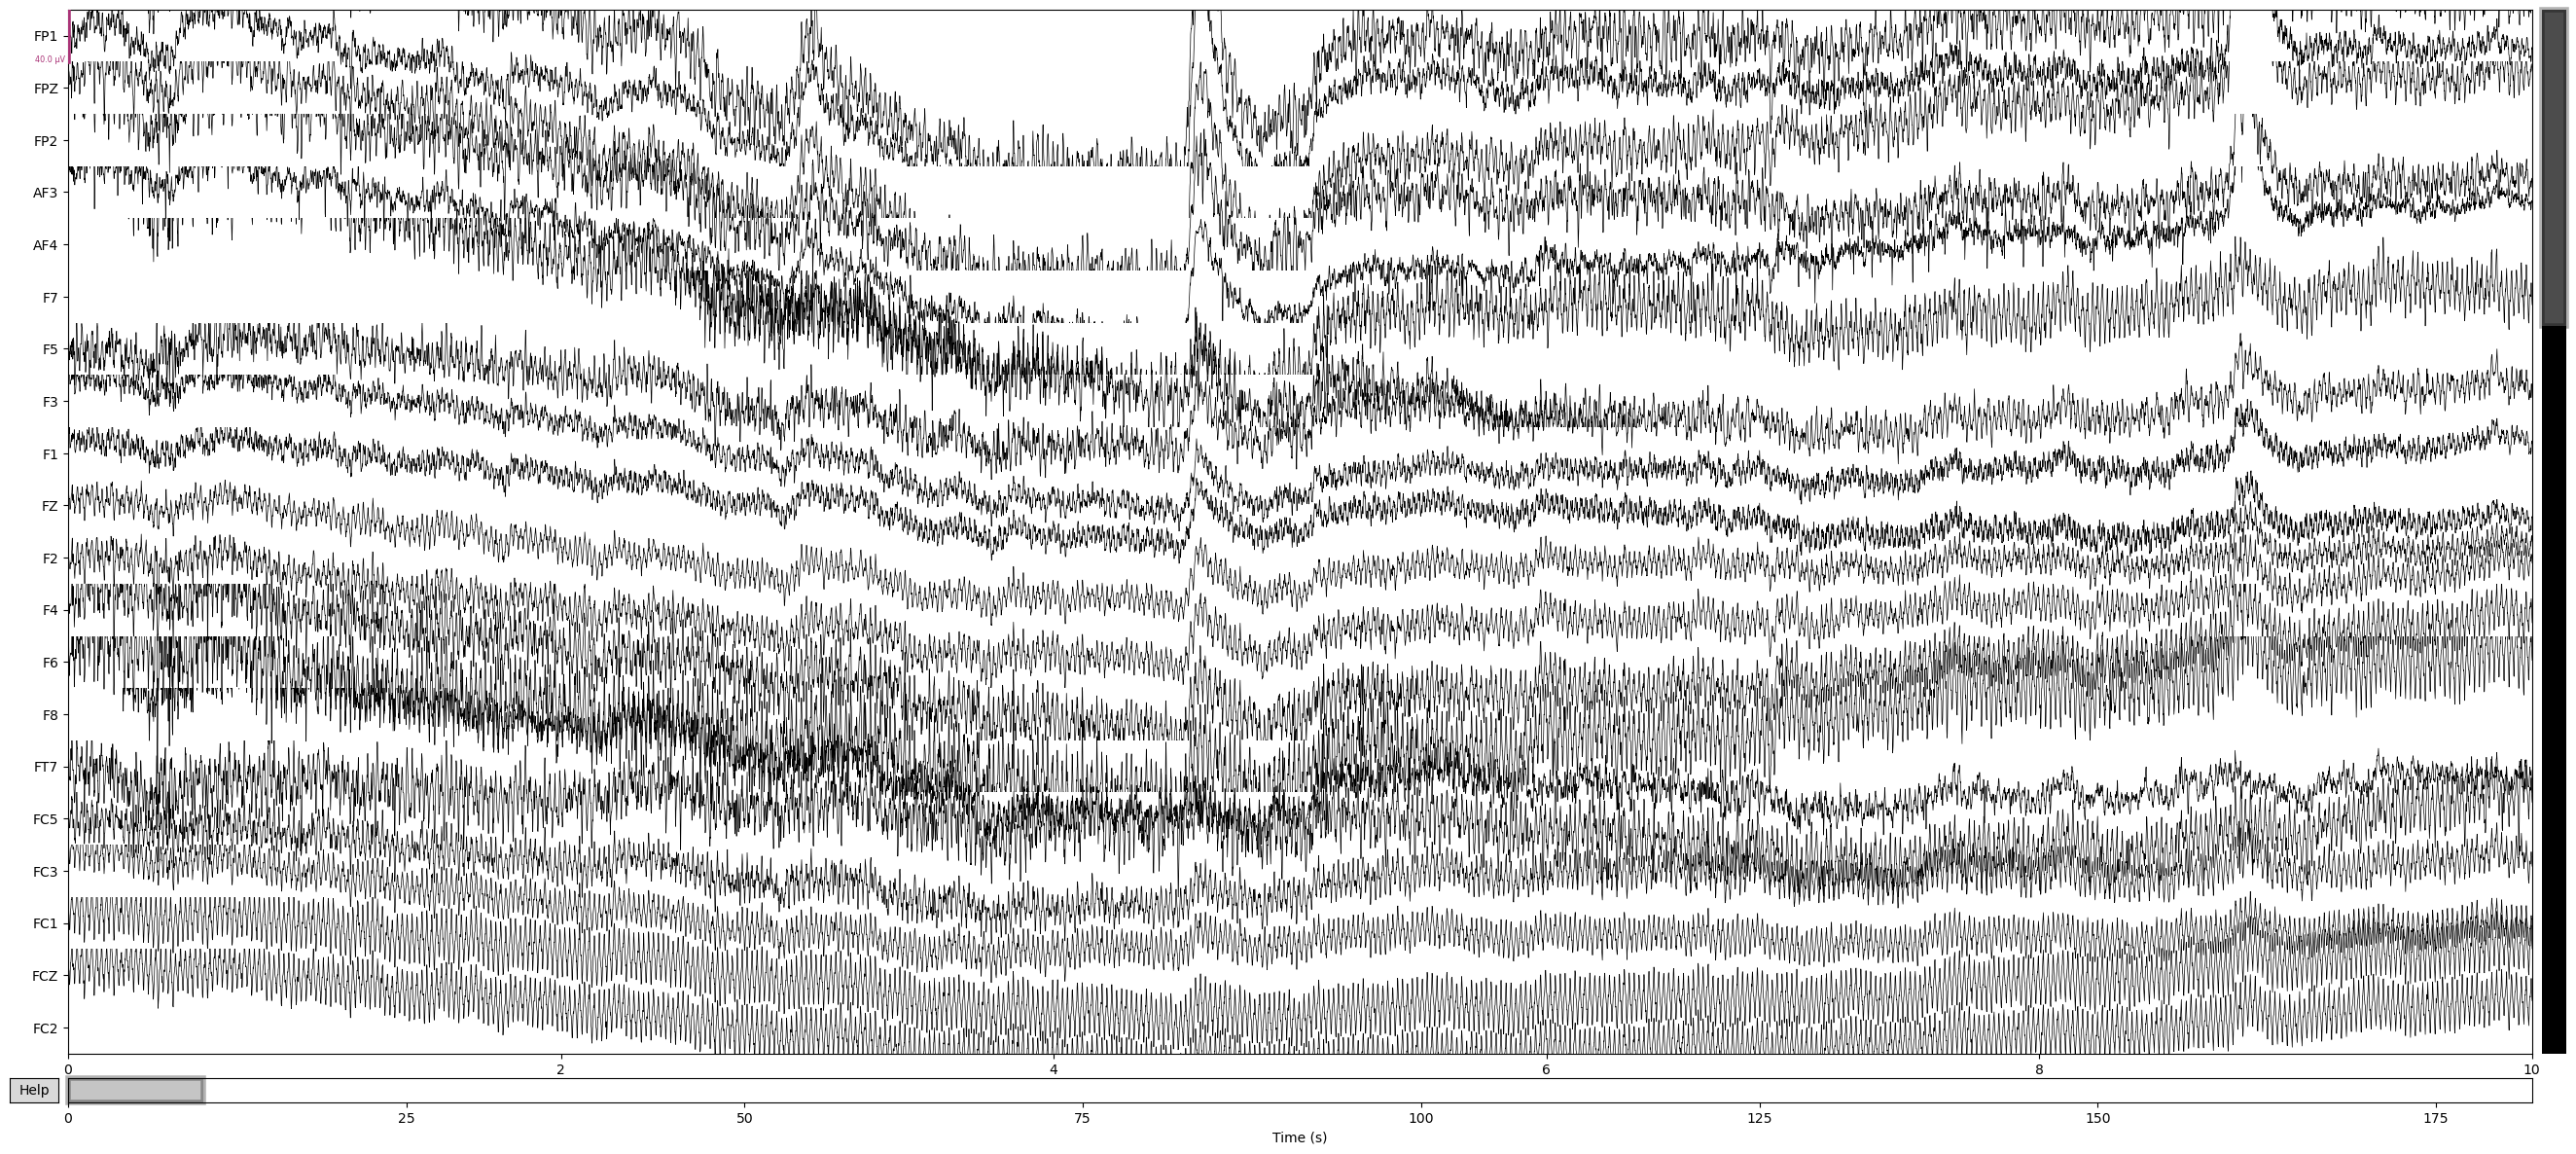

In [7]:
%matplotlib qt
raws.plot()

In [10]:
raws.info.get_channel_types()

['eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'misc',
 'misc']

In [11]:
raws.notch_filter([50,150,250,350,450],picks=['eeg'])
rawr.notch_filter([50,150,250,350,450],picks=['eeg'])

<RawCurry | resting.dat, 66 x 188300 (188.3 s), ~94.9 MB, data loaded>

D:\Users\xiaowu\anaconda3\envs\bci\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


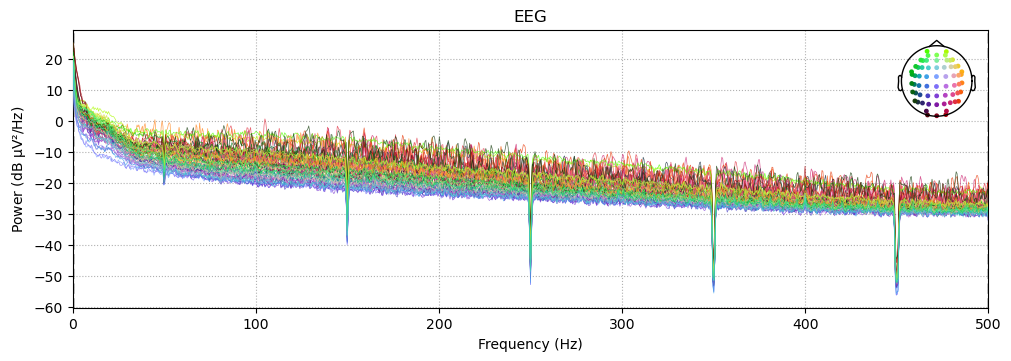

In [12]:
raws.compute_psd().plot()

D:\Users\xiaowu\anaconda3\envs\bci\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


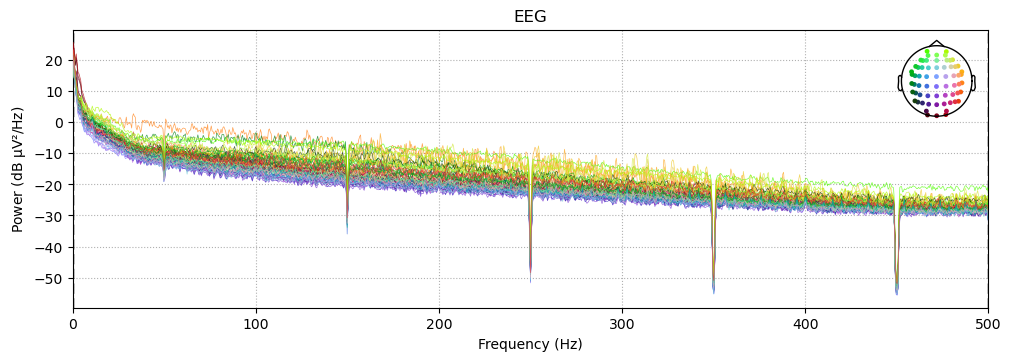

In [13]:
rawr.compute_psd().plot()

In [18]:
events=[[ind,0,1] for ind in range(10, 183)]
eventr=[[ind,0,0] for ind in range(10, 183)]

In [26]:
epochs=mne.Epochs(raws,events,tmin=0,tmax=1,baseline=(0, 0))
epochr=mne.Epochs(rawr,eventr,tmin=0,tmax=1,baseline=(0, 0))

In [27]:
a=epochs.get_data()

In [28]:
a.shape

(173, 66, 1001)

D:\Users\xiaowu\anaconda3\envs\bci\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


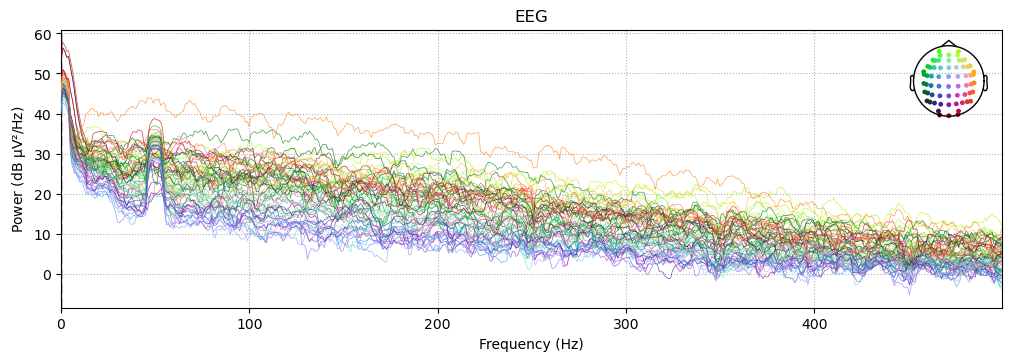

In [29]:
epochs.compute_psd().plot()

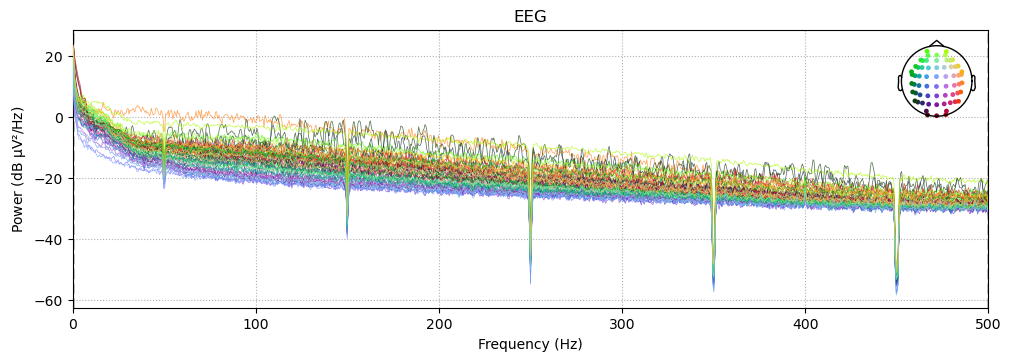

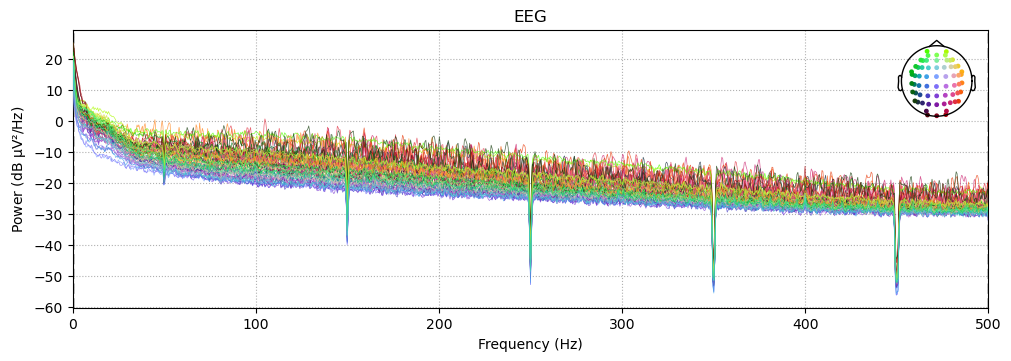

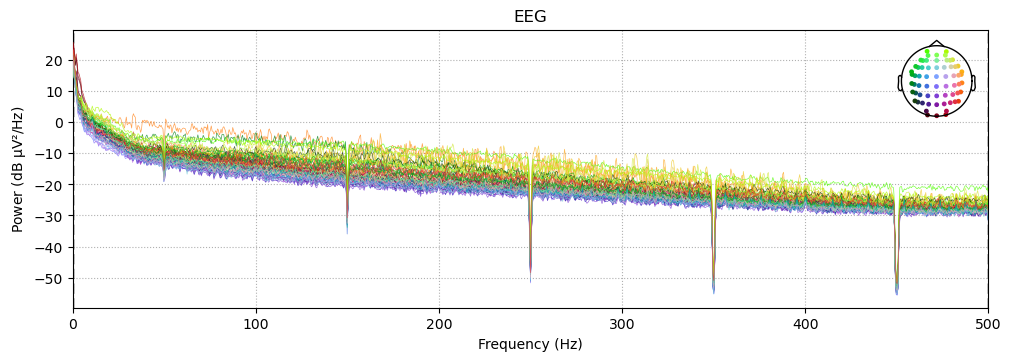

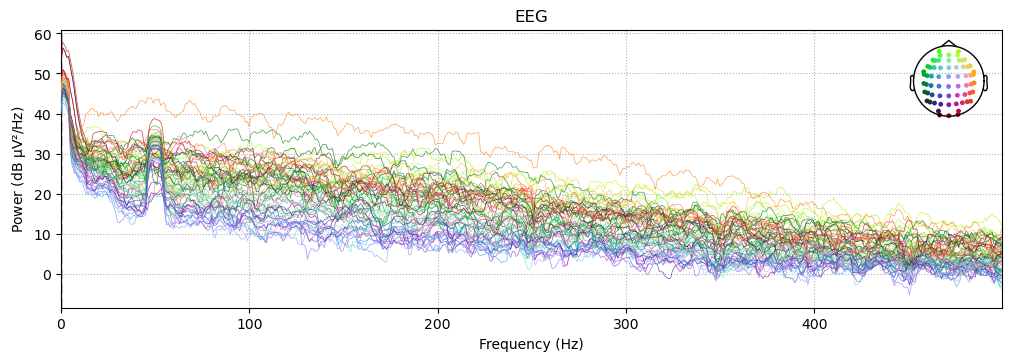

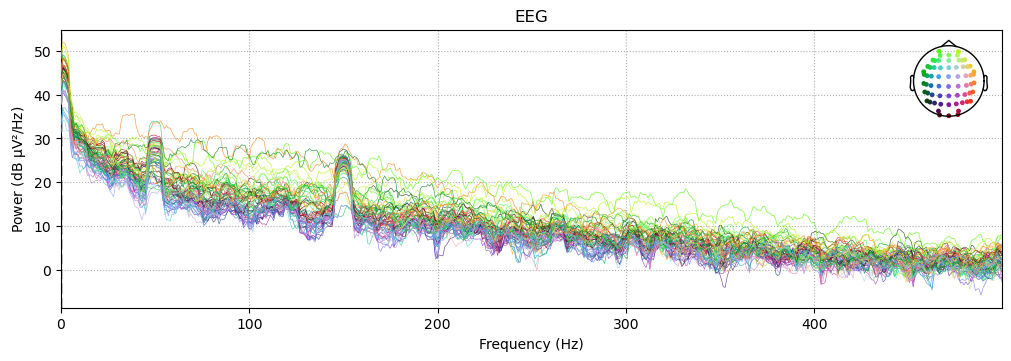

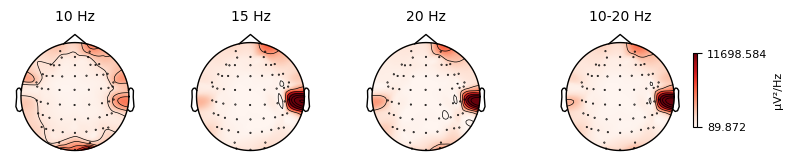

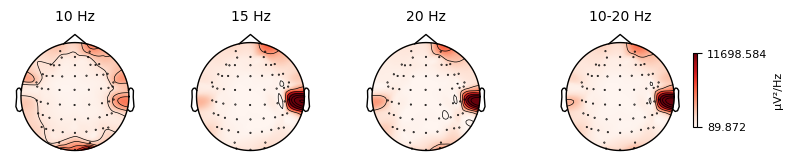

In [32]:
bands = {"10 Hz": 10, "15 Hz": 15, "20 Hz": 20, "10-20 Hz": (10, 20)}
epochs.compute_psd().plot_topomap(bands=bands, vlim="joint", ch_type="eeg")

D:\Users\xiaowu\anaconda3\envs\bci\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


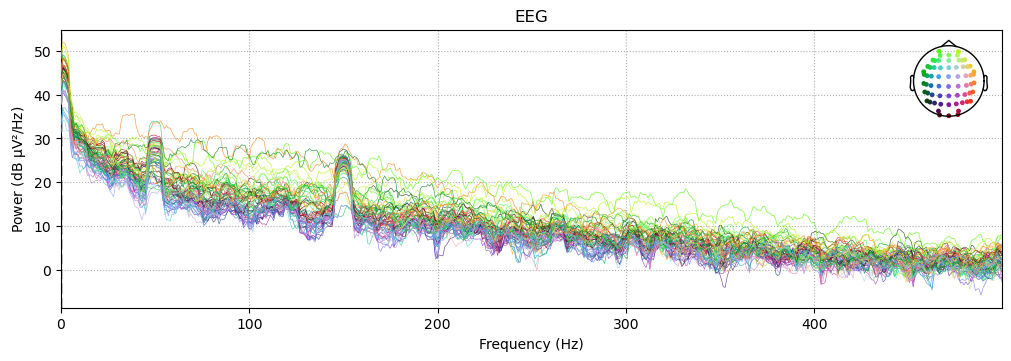

In [30]:
epochr.compute_psd().plot()

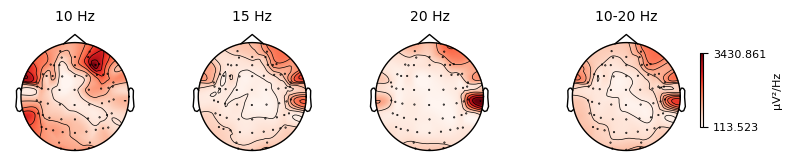

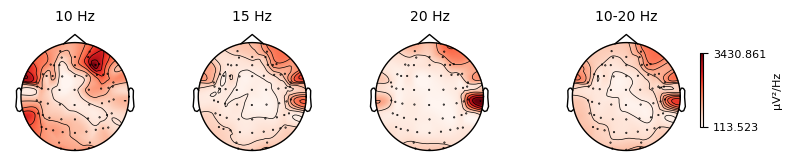

In [34]:
bands = {"10 Hz": 10, "15 Hz": 15, "20 Hz": 20, "10-20 Hz": (10, 20)}
epochr.compute_psd().plot_topomap(bands=bands, vlim="joint", ch_type="eeg")

### How brain repsonse as stimulation continues: compare EEG recorded in the first x seconds and last x seconds.

In [36]:
data=epochr.get_data()

In [38]:
epochr1=mne.EpochsArray(data[:50,:,:],epochr.info)

In [40]:
epochr2=mne.EpochsArray(data[-50:,:,:],epochr.info)

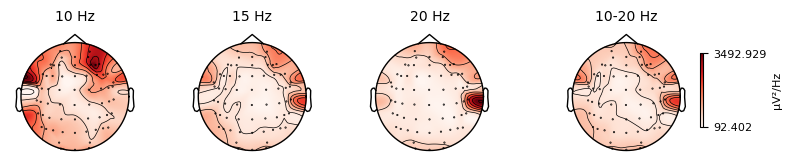

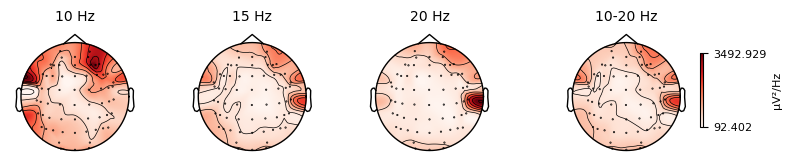

In [42]:
epochr1.compute_psd().plot_topomap(bands=bands, vlim="joint", ch_type="eeg")

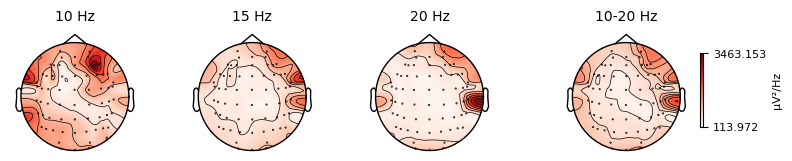

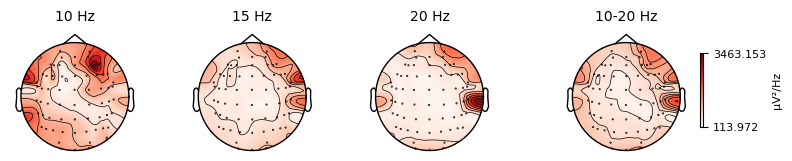

In [43]:
epochr2.compute_psd().plot_topomap(bands=bands, vlim="joint", ch_type="eeg")